<a href="https://colab.research.google.com/github/pallaamulya/Audio-Image-GENAI/blob/main/Audio_Image_GENAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
from google.colab import drive
drive.mount('/content/drive')

!cp "/content/drive/My Drive/audio-image-genai/Audio to Image Using GENAI.ipynb" "/content/Audio_Image_GENAI.ipynb"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
cp: cannot stat '/content/drive/My Drive/audio-image-genai/Audio to Image Using GENAI.ipynb': No such file or directory


In [32]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())


2.7.1+cu118
True


In [33]:
!pip install --upgrade torch torchvision torchaudio
!pip install --upgrade diffusers transformers accelerate scipy
!pip install speechrecognition pydub


In [34]:
!apt install ffmpeg


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [35]:
from google.colab import files
uploaded = files.upload()


Saving 1.opus to 1.opus


In [36]:
from pydub import AudioSegment

# This works if FFmpeg is correctly installed
audio = AudioSegment.from_file("1.opus")  # removed format="opus"
audio.export("converted.wav", format="wav")


<_io.BufferedRandom name='converted.wav'>

In [37]:
import speech_recognition as sr

recognizer = sr.Recognizer()
with sr.AudioFile("converted.wav") as source:
    audio_data = recognizer.record(source)

try:
    text = recognizer.recognize_google(audio_data)
    print("🎤 Recognized Text:", text)
except sr.UnknownValueError:
    print("Could not understand the audio.")
    text = None


🎤 Recognized Text: rose flowers


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

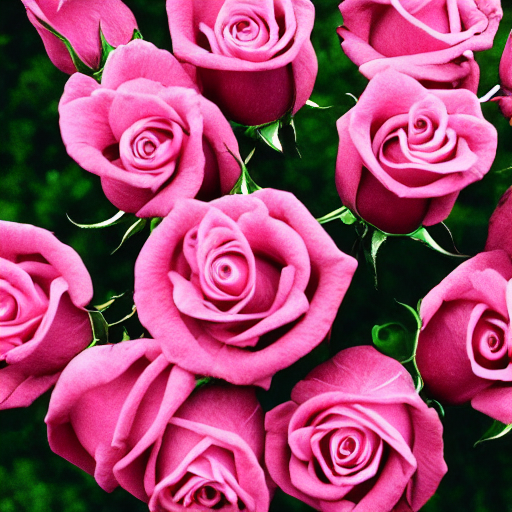

In [38]:
from diffusers import StableDiffusionPipeline
import torch

pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16
).to("cuda")

if text:
    image = pipe(text).images[0]
    image.save("output.png")
    display(image)


In [39]:
from google.colab import files
uploaded = files.upload()


Saving 2.opus to 2.opus


In [40]:
from pydub import AudioSegment

# This works if FFmpeg is correctly installed
audio = AudioSegment.from_file("2.opus")  # removed format="opus"
audio.export("converted.wav", format="wav")


<_io.BufferedRandom name='converted.wav'>

In [41]:
import speech_recognition as sr

recognizer = sr.Recognizer()
with sr.AudioFile("converted.wav") as source:
    audio_data = recognizer.record(source)

try:
    text = recognizer.recognize_google(audio_data)
    print("🎤 Recognized Text:", text)
except sr.UnknownValueError:
    print("Could not understand the audio.")
    text = None


🎤 Recognized Text: bunch of trees on the straight


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

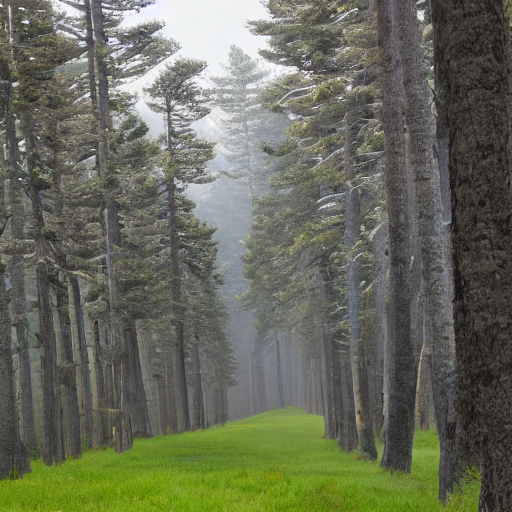

In [42]:
from diffusers import StableDiffusionPipeline
import torch

pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16
).to("cuda")

if text:
    image = pipe(text).images[0]
    image.save("output.png")
    display(image)


Saving 3.opus to 3.opus
🎤 Recognized Text: mountains


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

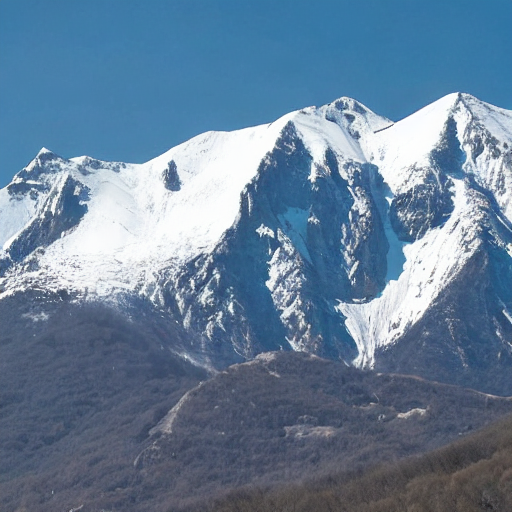

In [43]:
from google.colab import files
uploaded = files.upload()

from pydub import AudioSegment

# This works if FFmpeg is correctly installed
audio = AudioSegment.from_file("3.opus")  # removed format="opus"
audio.export("converted.wav", format="wav")

import speech_recognition as sr

recognizer = sr.Recognizer()
with sr.AudioFile("converted.wav") as source:
    audio_data = recognizer.record(source)

try:
    text = recognizer.recognize_google(audio_data)
    print("🎤 Recognized Text:", text)
except sr.UnknownValueError:
    print("Could not understand the audio.")
    text = None

from diffusers import StableDiffusionPipeline
import torch

pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16
).to("cuda")

if text:
    image = pipe(text).images[0]
    image.save("output.png")
    display(image)
